# Problem
we will try to build a model that will predict the price of a car depending on its most important attributes. So the question is what factors or variables affect the price of a car.

# Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython import display



%matplotlib inline

# DATA IMPORT

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
pd.isnull(data).any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
pd.isna(data).any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [6]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
data['model'] = [x.split()[0] for x in data['CarName']] # conversion to correct names
data['model'] = data['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

In [8]:
data= data.drop(['car_ID','CarName'], axis=1)

# Data visualisation

model
Mazda          31.941176
Nissan         32.944444
Porsche        26.000000
Toyota         32.906250
Volkswagen     34.916667
alfa-romero    26.666667
audi           24.142857
bmw            25.375000
buick          21.000000
chevrolet      46.333333
dodge          34.111111
honda          35.461538
isuzu          36.000000
jaguar         18.333333
mercury        24.000000
mitsubishi     31.153846
peugeot        26.636364
plymouth       34.142857
renault        31.000000
saab           27.333333
subaru         30.750000
volvo          25.818182
Name: highwaympg, dtype: float64


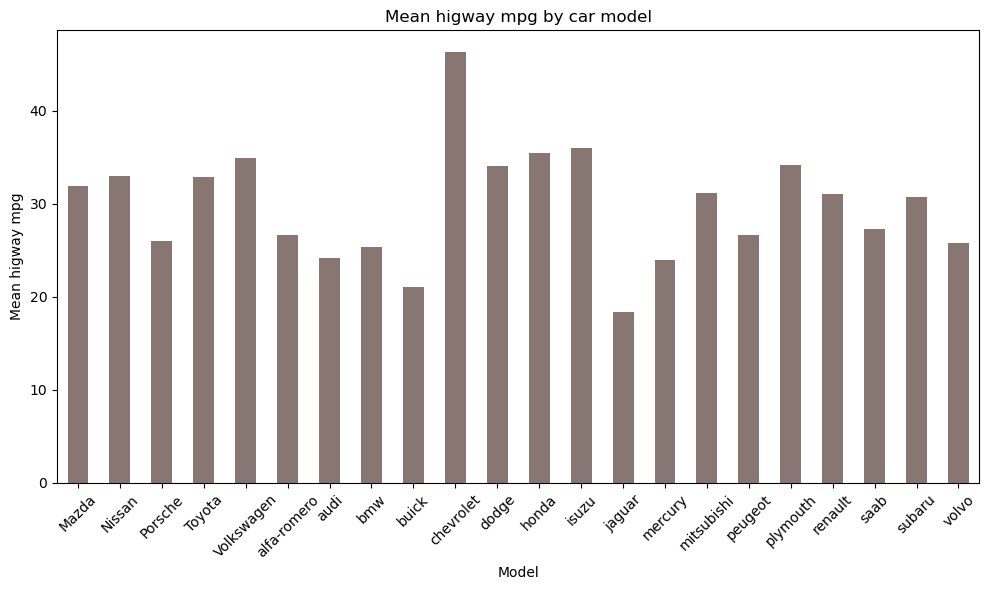

In [9]:
model_highwaympg = data.groupby('model')['highwaympg'].mean()
print(model_highwaympg)

plt.figure(figsize=(10, 6))
model_highwaympg.plot(kind='bar',color='#887672')

plt.title('Mean higway mpg by car model')
plt.xlabel('Model')
plt.ylabel('Mean higway mpg')
plt.xticks(rotation=45)
plt.tight_layout()

model
Mazda          25.705882
Nissan         27.000000
Porsche        17.400000
Toyota         27.500000
Volkswagen     28.583333
alfa-romero    20.333333
audi           18.857143
bmw            19.375000
buick          18.500000
chevrolet      41.000000
dodge          28.000000
honda          30.384615
isuzu          31.000000
jaguar         14.333333
mercury        19.000000
mitsubishi     24.923077
peugeot        22.454545
plymouth       28.142857
renault        23.000000
saab           20.333333
subaru         26.333333
volvo          21.181818
Name: citympg, dtype: float64


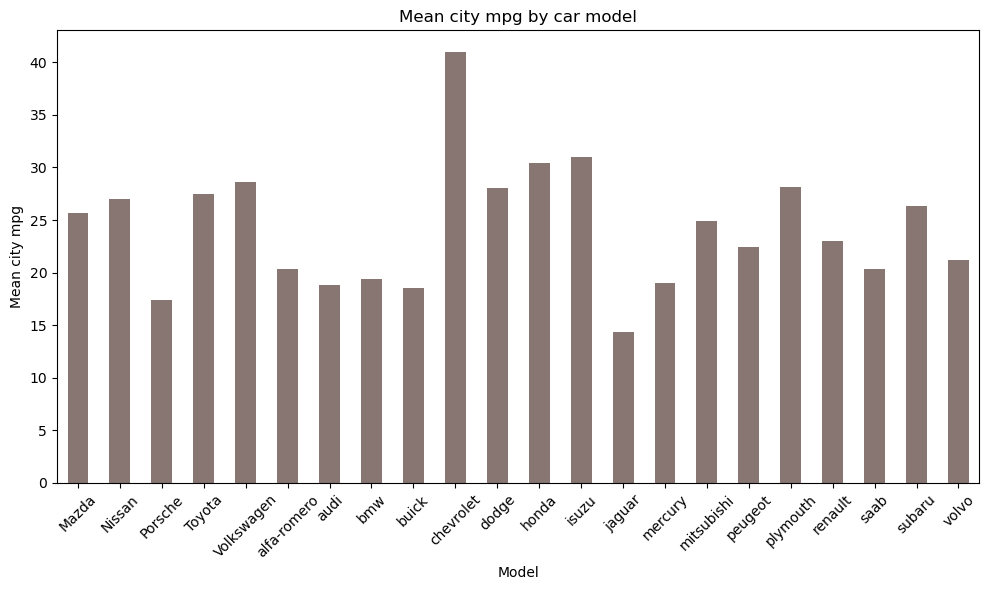

In [10]:
model_citympg = data.groupby('model')['citympg'].mean()
print(model_citympg)

plt.figure(figsize=(10, 6))
model_citympg.plot(kind='bar',color='#887672')

plt.title('Mean city mpg by car model')
plt.xlabel('Model')
plt.ylabel('Mean city mpg')
plt.xticks(rotation=45)
plt.tight_layout()

### based on this we can calculate a mean mpg

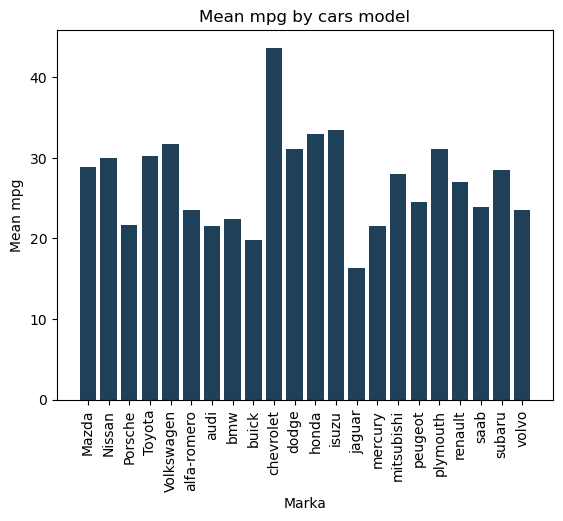

In [11]:
data = data.assign(mean_mpg=(data['citympg'] + data['highwaympg']) / 2)

mean_mpg_by_model = data.groupby('model')['mean_mpg'].mean()

plt.bar(mean_mpg_by_model.index, mean_mpg_by_model.values, color = '#1E4059')
plt.xticks(rotation=90)
plt.xlabel('Marka')
plt.ylabel('Mean mpg')
plt.title('Mean mpg by cars model')
plt.show()

data.drop('mean_mpg',axis=1 ,inplace=True)

Toyota         32
Nissan         18
Mazda          17
mitsubishi     13
honda          13
Volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
Porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: model, dtype: int64


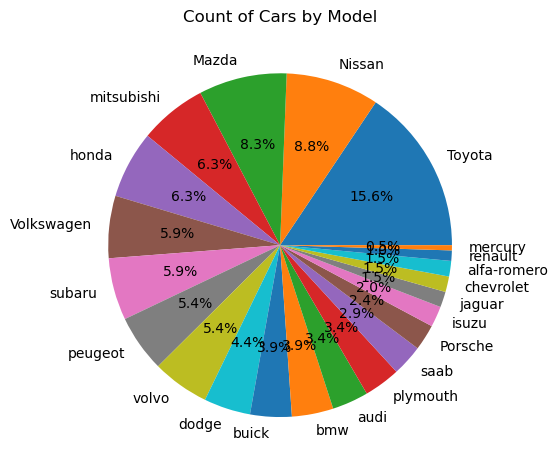

In [12]:
model_counts = data['model'].value_counts()
print(model_counts)

plt.pie(model_counts, labels=model_counts.index, autopct='%.1f%%')

plt.title('Count of Cars by Model')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


The largest collection in our data are Toyotas

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


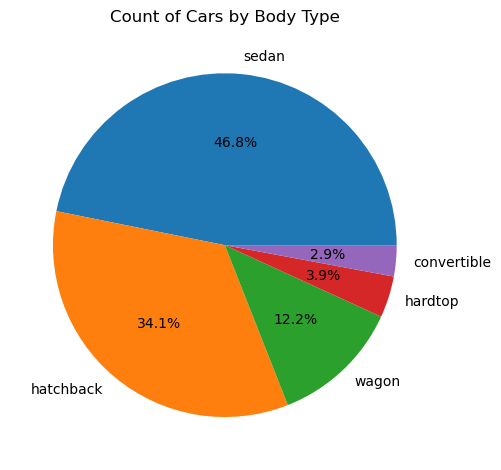

In [13]:
carbody_counts = data['carbody'].value_counts()
print(carbody_counts)

plt.pie(carbody_counts, labels=carbody_counts.index, autopct='%.1f%%')

plt.title('Count of Cars by Body Type')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

Sedans are the most popular.

front    202
rear       3
Name: enginelocation, dtype: int64


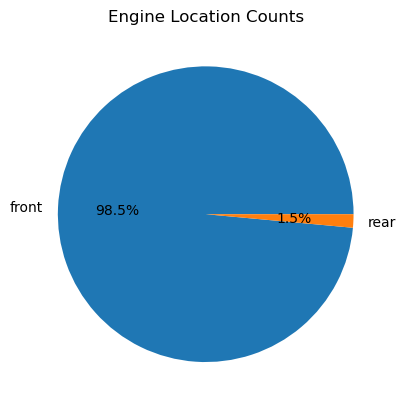

In [14]:
enginelocation_counts = data['enginelocation'].value_counts()
print(enginelocation_counts)

plt.pie(enginelocation_counts, labels=enginelocation_counts.index, autopct='%.1f%%')
plt.title('Engine Location Counts')
plt.show()

most of the cars have engine located at the front. Rear-engined cars are usually more expensive.

# Dummies

In [15]:
lab=LabelEncoder()
data['fuelsystem']=lab.fit_transform(data['fuelsystem'])
data['cylindernumber']=lab.fit_transform(data['cylindernumber'])
data['enginetype']=lab.fit_transform(data['enginetype'])
data['enginelocation']=lab.fit_transform(data['enginelocation'])
data['drivewheel']=lab.fit_transform(data['drivewheel'])
data['carbody']=lab.fit_transform(data['carbody'])
data['doornumber']=lab.fit_transform(data['doornumber'])
data['aspiration']=lab.fit_transform(data['aspiration'])
data['fueltype']=lab.fit_transform(data['fueltype'])
data['model']=lab.fit_transform(data['model'])

In [16]:
data.price.skew()

1.7776781560914454


A positive skewness value (greater than zero) acts on the skewness to the right, which means that the tail of the distribution is to the right. This suggests that it may contain several values

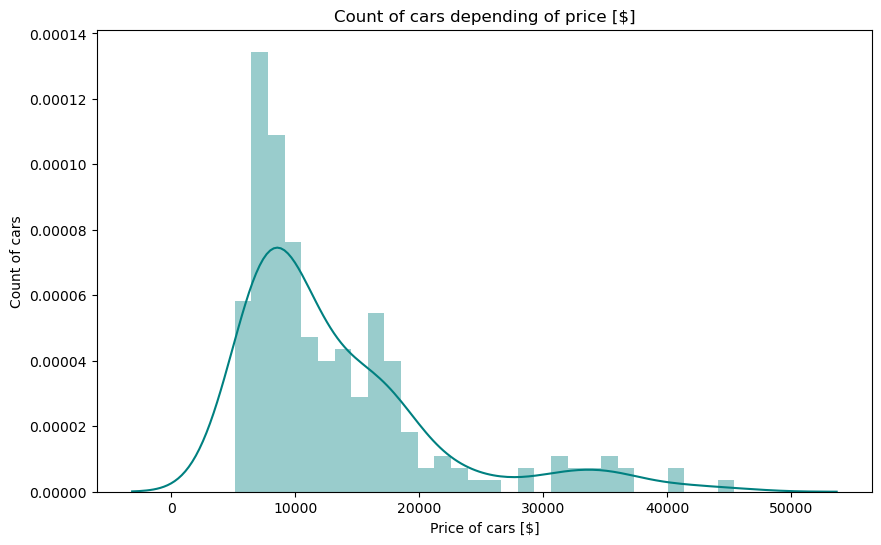

In [17]:
# price distribution
plt.figure(figsize=(10,6))
sns.distplot(data['price'], bins = 30, hist=True, kde=True, color='teal')

plt.xlabel('Price of cars [$]')
plt.ylabel('Count of cars')
plt.title('Count of cars depending of price [$]')
plt.show()

In [18]:
#sns.pairplot(data)

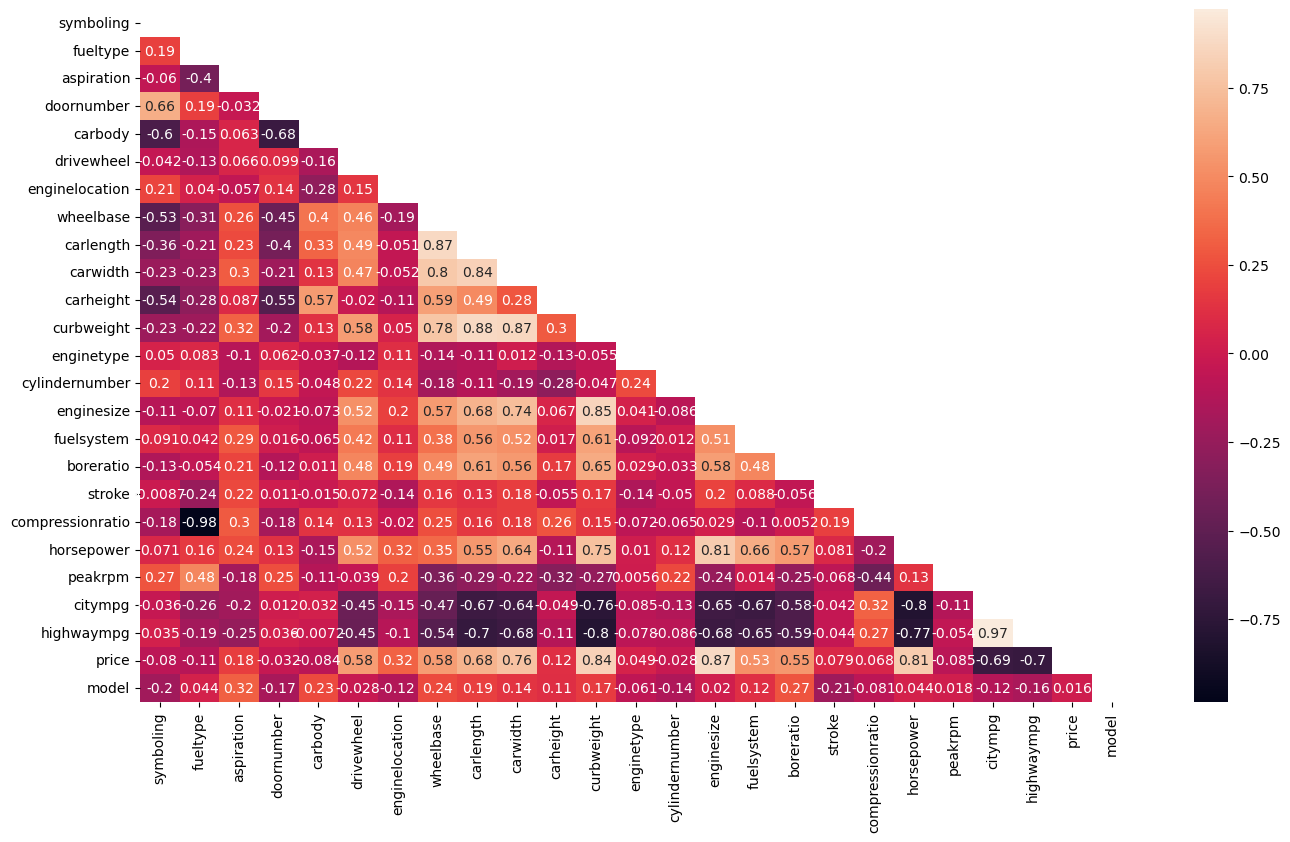

In [19]:
data.corr() #PEARSON CORR

mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [20]:
data = data.drop('citympg',axis=1)

# Model
basic model without any changes

In [21]:
prices = data['price']
features = data.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)

print('Training data r-squared:', regr.score(X_train, Y_train))
print('Test data r-squared:', regr.score(X_test, Y_test))
print('Intercept:', regr.intercept_)
print(f"Model: {regr} and RMSE score: {np.sqrt(mean_squared_error(Y_test, y_pred))}, R2 score: {r2_score(Y_test, y_pred)}")

coefficients = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print(coefficients)

Training data r-squared: 0.9074046385995874
Test data r-squared: 0.5850101498664722
Intercept: -62138.51348456399
Model: LinearRegression() and RMSE score: 4631.215336882425, R2 score: 0.5850101498664722
                         coef
symboling          -81.465455
fueltype            50.098269
aspiration        1587.357338
doornumber       -1003.560971
carbody           -951.851806
drivewheel        -304.340453
enginelocation    5974.882403
wheelbase          118.359267
carlength           -4.896848
carwidth           386.091939
carheight          220.265650
curbweight           2.962131
enginetype         452.758110
cylindernumber     882.475281
enginesize         139.459042
fuelsystem         -46.956691
boreratio        -2156.699712
stroke           -3636.380256
compressionratio    73.505355
horsepower          24.545327
peakrpm              2.992365
highwaympg         111.684840
model              -97.763528


In [22]:
data['price'].skew()

1.7776781560914454

In [23]:
y_log = np.log(data['price'])
y_log.tail()

200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, dtype: float64

In [24]:
y_log.skew()

0.672888533977329

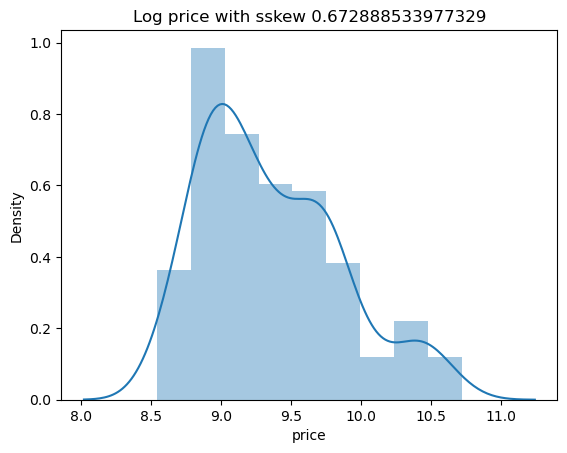

In [25]:
sns.distplot(y_log)
plt.title(f'Log price with sskew {y_log.skew()}')
plt.show()

### Model with log prices

Logarithms are often used in data output and modeling, especially when the data has a skewed distribution or large outliers. Taking the data logarithm helps to remove the skewness of the distribution, reduce the impact of outliers, and transform the data to better match the assumptions of the statistical model.

In [26]:
prices = np.log(data['price'])
features = data.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)

print('Training data r-squared:', regr.score(X_train, Y_train))
print('Test data r-squared:', regr.score(X_test, Y_test))
print('Intercept:', regr.intercept_)
print(f"Model: {regr} and RMSE score: {np.sqrt(mean_squared_error(Y_test, y_pred))}, R2 score: {r2_score(Y_test, y_pred)}")

coefficients = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print(coefficients)

Training data r-squared: 0.916296727333797
Test data r-squared: 0.6944806272322189
Intercept: 4.54661416803201
Model: LinearRegression() and RMSE score: 0.25558267254132894, R2 score: 0.6944806272322189
                      coef
symboling        -0.001521
fueltype          0.395337
aspiration        0.040705
doornumber       -0.093569
carbody          -0.055501
drivewheel       -0.005224
enginelocation    0.208091
wheelbase         0.005102
carlength         0.000957
carwidth          0.018426
carheight         0.006676
curbweight        0.000384
enginetype        0.029494
cylindernumber    0.031149
enginesize        0.002502
fuelsystem        0.020760
boreratio        -0.030067
stroke           -0.116560
compressionratio  0.039713
horsepower        0.004050
peakrpm           0.000105
highwaympg        0.001856
model            -0.006434


R2 score is good but we will try to improve this

# Pvalues & Evaluating Coefficients

In [27]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params,'pvalues': round(results.pvalues, 3)}).sort_values(by='pvalues') #OVER 0.05 NOT SIGNIFICANT

,coef,pvalues
const,4.546614,0.000
curbweight,0.000384,0.000
model,-0.006434,0.011
horsepower,0.004050,0.016
doornumber,-0.093569,0.026
carbody,-0.055501,0.029
stroke,-0.116560,0.032
peakrpm,0.000105,0.039
fuelsystem,0.020760,0.044
enginesize,0.002502,0.064


significiant if pvalue < 0.05

# Testing for multicollinearity

In [28]:
vif = [variance_inflation_factor(exog=X_incl_const, exog_idx = each) for each in range (X_incl_const.shape[1])]

pd.DataFrame({'coef': X_incl_const.columns, 'vif' : np.round(vif, 2)}).sort_values(by='vif',ascending=False)

,coef,vif
0,const,8053.04
2,fueltype,87.33
19,compressionratio,83.49
20,horsepower,23.90
15,enginesize,19.07
12,curbweight,18.93
9,carlength,12.05
8,wheelbase,11.62
10,carwidth,9.09
22,highwaympg,7.45


significiant if VIF < 10

In [29]:
pred2=['curbweight','model','horsepower','doornumber','carbody','stroke','peakrpm','fuelsystem'] 
# LOW pvalue and VIF

# Model Simplification & The Baysian Information Criterion

In [30]:
#Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params,'pvalues': round(results.pvalues, 3)}) #OVER 0.05 NOT SIGNIFICANT

print('BIC is:',results.bic)
print('R-squared is:',results.rsquared)

BIC is: -39.491734162476405
R-squared is: 0.916296727333797


In [31]:
#Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['fueltype','compressionratio','horsepower','carlength','wheelbase','highwaympg'], axis=1) #modyfikacja modelu

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

coef_minus_pred = pd.DataFrame({'coef': results.params,'pvalues': round(results.pvalues, 3)}) #OVER 0.05 NOT SIGNIFICANT

print('BIC is:',results.bic) #lepsze
print('R-squared is:',results.rsquared) #brak wpływu

BIC is: -59.13263811190207
R-squared is: 0.9105126793701401


In [32]:
frames = [org_coef, coef_minus_pred]
pd.concat(frames, axis=1)

,coef,pvalues,coef,pvalues
const,4.546614,0.000,4.425054,0.000
symboling,-0.001521,0.926,-0.003154,0.833
fueltype,0.395337,0.362,NaN,NaN
aspiration,0.040705,0.545,0.121389,0.006
doornumber,-0.093569,0.026,-0.096578,0.020
carbody,-0.055501,0.029,-0.052645,0.031
drivewheel,-0.005224,0.890,0.011128,0.748
enginelocation,0.208091,0.137,0.377869,0.003
wheelbase,0.005102,0.469,NaN,NaN
carlength,0.000957,0.781,NaN,NaN


# Residuals & Residuals Plots

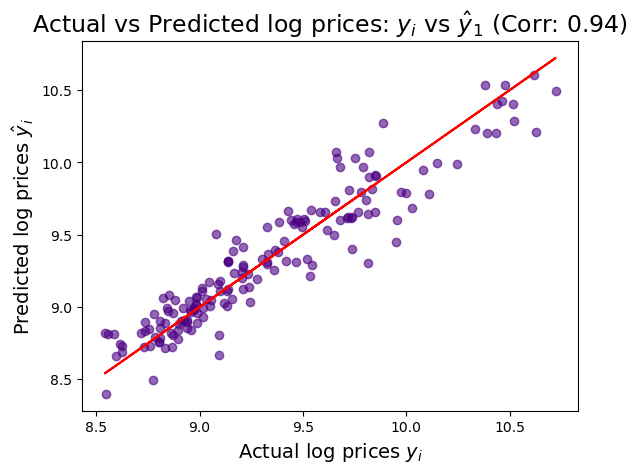

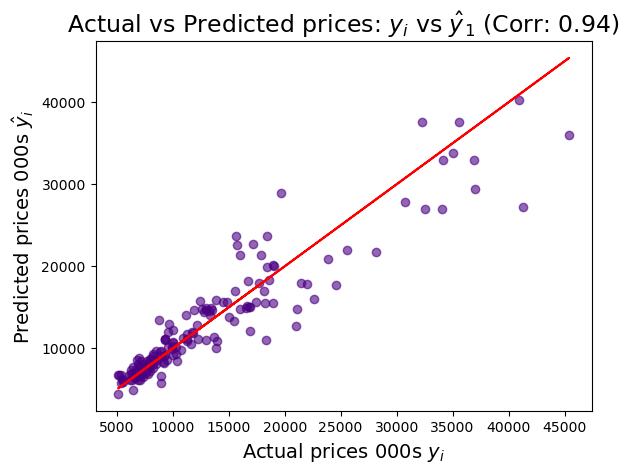

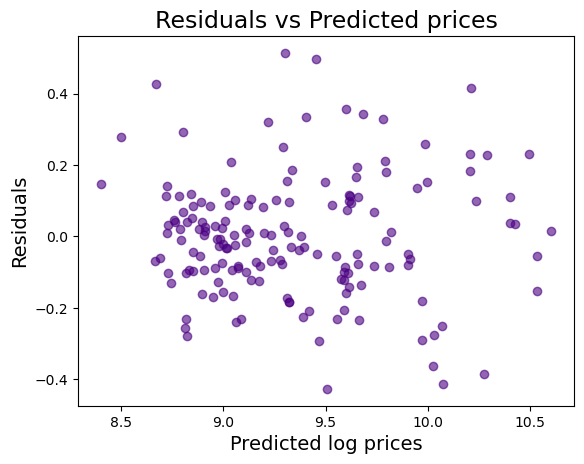

In [33]:
# Modified model: transformed (using log prices) & simplified (droppint two features)
prices = np.log(data['price']) #LOG PRICES
features = data[pred2]

X_train, X_test, Y_train, Y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)
 
# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs Predicter Prices
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(x=Y_train,y=results.fittedvalues, c = 'indigo', alpha = 0.6)
plt.plot(Y_train,Y_train, color='red')
plt.xlabel('Actual log prices $y_i$', fontsize= 14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize= 14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $ \hat y_1$ (Corr: {corr})',fontsize = 17)
plt.show()

plt.scatter(x=np.e**Y_train,y=np.e**results.fittedvalues, c = 'indigo', alpha = 0.6)
plt.plot(np.e**Y_train,np.e**Y_train, color='red')

plt.xlabel('Actual prices 000s $y_i$', fontsize= 14)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize= 14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $ \hat y_1$ (Corr: {corr})',fontsize = 17)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues,y=results.resid, c = 'indigo', alpha = 0.6)

plt.xlabel('Predicted log prices', fontsize= 14)
plt.ylabel('Residuals', fontsize= 14)
plt.title(f'Residuals vs Predicted prices',fontsize = 17)
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

Text(0.5, 1.0, 'Log price model: residuals Skew (0.331) Mean (-0.0)')

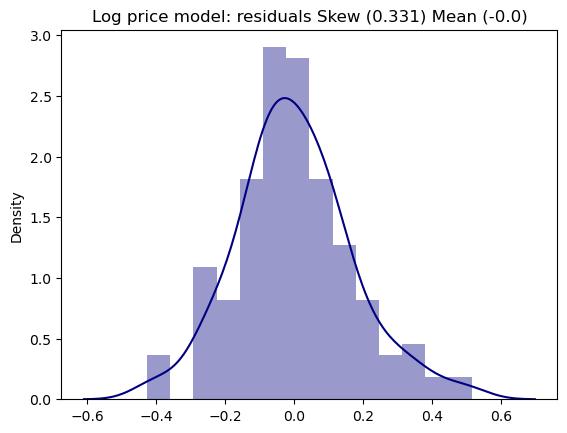

In [34]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')

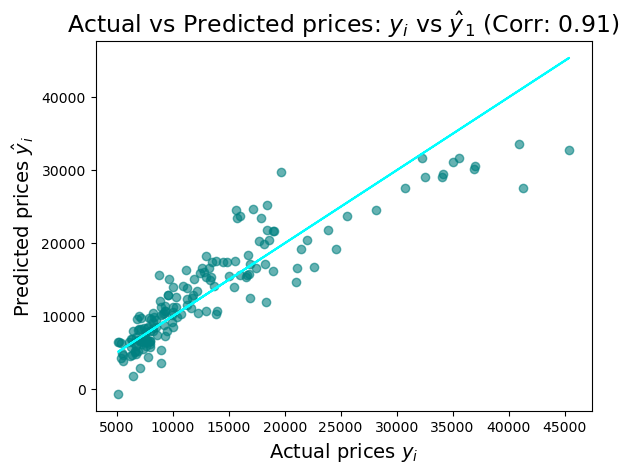

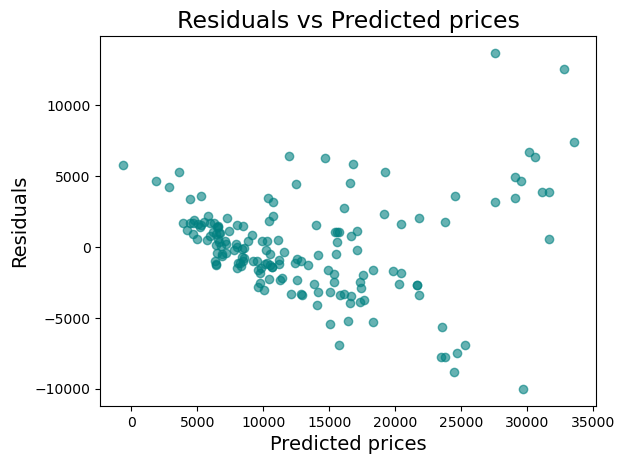

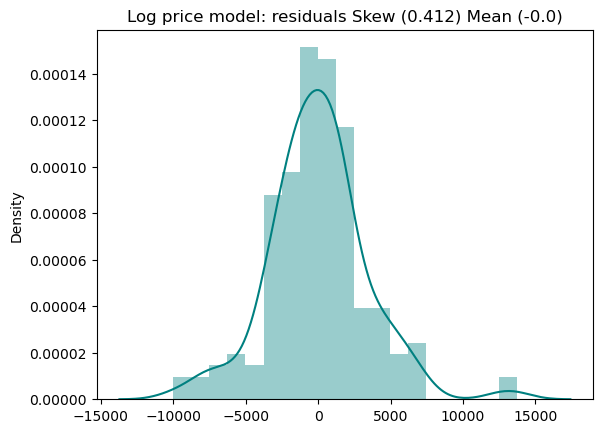

In [35]:
#ORIGINAL DATA
prices = data['price'] #ORGINAL PRICES
features = data[pred2]

X_train, X_test, Y_train, Y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results = model.fit()
corr = round(Y_train.corr(results.fittedvalues), 2)

# Predicted vs Actual prices
plt.scatter(x=Y_train,y=results.fittedvalues, c = 'teal', alpha = 0.6)
plt.plot(Y_train,Y_train, color='cyan')
plt.xlabel('Actual prices $y_i$', fontsize= 14)
plt.ylabel('Predicted prices $\hat y_i$', fontsize= 14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $ \hat y_1$ (Corr: {corr})',fontsize = 17)
plt.show()

# Residuals vs Prices
plt.scatter(x=results.fittedvalues,y=results.resid, c = 'teal', alpha = 0.6)

plt.xlabel('Predicted prices', fontsize= 14)
plt.ylabel('Residuals', fontsize= 14)
plt.title(f'Residuals vs Predicted prices',fontsize = 17)
plt.show()

# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'teal')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')


# Mean Squared Error & R-Squared
reduced_mse = round(results.mse_resid, 3)
reduced_rsquared = round(results.rsquared, 3)

# MSE RMSE

In [36]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared,reduced_rsquared],
              'MSE':[reduced_log_mse,reduced_mse,],
             'RMSE': np.sqrt([reduced_log_mse,reduced_mse])},
             index=['Reduced Log Model','Full Normal Price Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.891,3.000000e-02,0.173205
Full Normal Price Model,0.824,1.232666e+07,3510.935000


# Summary

based on the available R-Squared, MSE and RMSE statistics and the charts presented above, I chose the model with the logarithm of the price. It fits better and the Residual plot looks much better. Residuals are nicely distributed throughout the graph, which proves the lack of autocorrelation, they oscillate around zero. In addition, it is more like a normal distribution because it is less slanted. Higher correlation in the graphs also indicates a better fit of the model.


In [37]:
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

The upper bound in normal prices is $ 42419.473742415474
The lower bound in normal prices is $ 21216.670566567747


# BUILDING A TOOL
Since we already have a prepared model, it would be appropriate to use it. We will use a function that will accept arguments relevant to the model and estimate the price of this car. To keep the code readable, I made the tool in a separate python file.

In [45]:
import car_tool as tl
tl.calc_price(2000,1000,0,4,4.3,10000,1,True)

Estimated price of car: 198000.0$
 Upper Bound: 286000.0$
 Lower Bound: 136000.0$
